# This is a Data Exploration Notebook for a Time Series Machine Learning Model 

### The model was developed on another Notebook

### The Notebooks that are used in this project are: 
DateExploration, 
DataPreProcessing, 
TimeSeriesForecastTry-XGBoost, 
Womens-TimeSeriesForecastTry-XGBoost, 
Mens-TimeSeriesForecastTry-XGBoost, and 
Accessories-TimeSeriesForecastTry-XGBoost

Data Exploration:

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime 

In [3]:
rand_state = 1000
pd.set_option('display.max_columns', None)

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
df1 = pd.read_csv('DS Assessment/Budget.csv')

In [6]:
df1

,Date,PlanningType,Company,store,Brand Code,Budget Sales Amount,Budget Margin Amount,Budget Cost Amount,FashionCOGS
0,07/01/2022,BUDGET,cocouae,C555,coco,145158.5206,75022.88783,70097.63482,57787.01834
1,09/01/2022,BUDGET,cocouae,C555,coco,145121.9455,74994.28602,70088.88499,57793.10536
2,11/01/2022,BUDGET,cocouae,C555,coco,145159.1929,75016.21929,70118.86620,57793.73149
3,16/01/2022,BUDGET,cocouae,C555,coco,145152.5931,75000.35308,70096.91001,57750.83666
4,18/01/2022,BUDGET,cocouae,C555,coco,145127.7888,75010.49502,70096.45980,57788.68156
...,...,...,...,...,...,...,...,...,...
360,25/11/2022,BUDGET,cocouae,C555,coco,123306.9067,68190.32528,55094.45906,44611.41114
361,26/11/2022,BUDGET,cocouae,C555,coco,123290.5671,68169.17666,55126.39589,44623.21413
362,13/12/2022,BUDGET,cocouae,C555,coco,145138.5313,79597.51411,65539.26286,53189.99203
363,14/12/2022,BUDGET,cocouae,C555,coco,145144.4156,79579.00491,65514.71945,53168.91734


In [ ]:
df2 = pd.read_csv('DS Assessment/Holidays_By_Country.csv')
df2

,Country,Date,SpecialDay
0,Bahrain,19/12/2022,National Day
1,Bahrain,18/12/2022,National Day
2,Qatar,18/12/2022,National Day
3,Bahrain,17/12/2022,National Day
4,Bahrain,16/12/2022,National Day
...,...,...,...
995,Lebanon,09/03/2019,Teachers' Day
996,Bahrain,28/02/2019,Spring Break
997,Egypt,28/02/2019,Spring Break
998,Egypt,27/02/2019,Spring Break


In [ ]:
df3 = pd.read_csv('DS Assessment/Product.csv')
df3

In [9]:
df4 = pd.read_csv('/Users/hasan/Desktop/DS Assessment/Sales_Daily.csv')
df4

,Company,IteE ID,Variant ID,Transaction ID,LINENUM,Transaction Date,Transaction Time,Store,Quantity,Customer ID,Net Initial Price,Net Price,Net Cost Amount,Net Discount Amount,Net Amount,Net Gross Profit
0,cocouae,ZS5BYXL_045013,XZC0749421,C555-TC555-02-33943,3.0,03/12/2020,65288,C555,1,C555,403.535057,276.631025,117.303834,-44.383126,259.758248,125.832616
1,cocouae,ZS3CNZL_0002,XZC0672405,C555-TC555-03-20347,2.0,29/12/2020,62895,C555,1,C555,166.662169,207.539412,13.786616,-4.078733,173.032323,112.816152
2,cocouae,ZE9ADEL_0001,XZC0404354,C555-TC555-03-16762,4.0,05/12/2020,51559,C555,1,C555,43.815391,44.340005,-27.180317,-32.929604,16.896037,-0.450845
3,cocouae,ZS5CTHL_016226,XZC0415231,C555-TC555-03-20321,3.0,29/12/2020,59034,C555,1,CFD067102,431.003588,439.540399,98.464487,-27.423540,416.112670,256.144304
4,cocouae,ZE7APBL_043646,XZC0790559,C555-TC555-01-9730,2.0,24/12/2020,55238,C555,1,C555,365.837663,229.132724,77.461531,-41.414470,254.215122,143.334795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502680,cocouae,ZS5DJ0L_0001,XZC0463264,R0127-TR0127-03-50505,2.0,09/10/2021,39792,R0127,1,R0127,391.875905,434.120649,114.670776,-19.636997,388.682672,249.949603
502681,cocouae,ZE5543L_000001,XZC0592207,R0127-TR0127-02-45475,1.0,30/01/2021,70736,R0127,1,R0127,522.092744,485.028717,127.606784,-20.644353,488.534601,310.107145
502682,cocouae,ZE9AB2L_0002,XZC0404572,R0127-TR0127-03-25069,3.0,08/02/2021,53711,R0127,1,R0127,32.643100,20.479361,-4.401592,-35.109337,48.343842,41.264234
502683,cocouae,ZE9AB3L_033093,XZC0404594,R0127-TR0127-03-31820,8.0,08/04/2021,61878,R0127,1,CFD067732,35.680560,41.448513,2.548033,-29.656155,55.366624,31.984134


In [ ]:
df5 = pd.read_csv('DS Assessment/Stock.csv')
df5

,Company,Store,ItemColorId,ItemSizeId,Fromdate,To_Date,IteEId,OHQty
0,cocouae,C555,19928,12,23/09/2015,12/01/2016,ZS1960L,1.0
1,cocouae,C555,20096,XL,23/09/2015,04/10/2015,ZE3D23L,2.0
2,cocouae,C555,1,6,23/09/2015,04/10/2015,ZS3570R,4.5
3,cocouae,C555,7524,6,23/09/2015,15/10/2015,ZS4H94L,1.5
4,cocouae,C555,1497,4,23/09/2015,28/10/2015,ZS7573L,3.5
...,...,...,...,...,...,...,...,...
1048570,cocouae,C555,48286,8,01/02/2022,04/03/2022,ZS5DKYL_043236,1.0
1048571,cocouae,C555,1,6,01/02/2022,03/03/2022,ZS6BAKL_0001,0.0
1048572,cocouae,C555,20096,L,01/02/2022,01/02/2022,ZE3CQ7L_020096,3.0
1048573,cocouae,C555,50421,8,01/02/2022,01/01/2050,ZS6BNFL_050421,0.0


In [14]:
df1.shape
df2.shape
df3.shape
df4.shape
df5.shape

(365, 9)

(1000, 3)

(74671, 43)

(502685, 16)

(1048575, 8)

In [15]:
df1.columns

Index(['Date', 'PlanningType', 'Company', 'store', 'Brand Code',
       'Budget Sales Amount', 'Budget Margin Amount', 'Budget Cost Amount',
       'FashionCOGS'],
      dtype='object')

In [16]:
df2.columns

Index(['Country', 'Date', 'SpecialDay'], dtype='object')

In [17]:
df3.columns

Index(['DW_Id', 'Product Key', 'Company', 'Item Barcode', 'IteE ID',
       'Item Option ID', 'PARTITION', 'INVENTDIMID', 'Product', 'Category',
       'Brand Code', 'Brand Name', 'Category Code', 'Category Name',
       'Division Code', 'Division', 'Group Code', 'Group', 'Height',
       'Subgroup Code', 'Subgroup', 'Size ID', 'Color ID', 'Season Code',
       'Vendor No', 'MODIFIEDDATETIME', 'Variant ID', 'Width',
       'Item Creation Date', 'Supp_BrandL2', 'Supp_BrandL3', 'Supp_BrandL4',
       'Supp_BrandSeason', 'Supp_Cut', 'Supp_Fabric', 'Supp_Story',
       'Product Type', 'ProductType Description', 'Vendor Name', 'DW_Batch',
       'DW_SourceCode', 'OriginalPrice', 'CurrentPrice'],
      dtype='object')

In [18]:
df4.columns

Index(['Company', 'IteE ID', 'Variant ID', 'Transaction ID', 'LINENUM',
       'Transaction Date', 'Transaction Time', 'Store', 'Quantity',
       'Customer ID', 'Net Initial Price', 'Net Price', 'Net Cost Amount',
       'Net Discount Amount', 'Net Amount', 'Net Gross Profit'],
      dtype='object')

In [19]:
df5.columns

Index(['Company', 'Store', 'ItemColorId', 'ItemSizeId', 'Fromdate', 'To_Date',
       'IteEId', 'OHQty'],
      dtype='object')

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  365 non-null    object 
 1   PlanningType          365 non-null    object 
 2   Company               365 non-null    object 
 3   store                 365 non-null    object 
 4   Brand Code            365 non-null    object 
 5   Budget Sales Amount   365 non-null    float64
 6   Budget Margin Amount  365 non-null    float64
 7   Budget Cost Amount    365 non-null    float64
 8   FashionCOGS           365 non-null    float64
dtypes: float64(4), object(5)
memory usage: 25.8+ KB


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     1000 non-null   object
 1   Date        1000 non-null   object
 2   SpecialDay  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74671 entries, 0 to 74670
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DW_Id                    74671 non-null  int64  
 1   Product Key              74671 non-null  int64  
 2   Company                  74671 non-null  object 
 3   Item Barcode             74649 non-null  object 
 4   IteE ID                  74671 non-null  object 
 5   Item Option ID           74671 non-null  float64
 6   PARTITION                74671 non-null  int64  
 7   INVENTDIMID              74671 non-null  object 
 8   Product                  74671 non-null  int64  
 9   Category                 0 non-null      float64
 10  Brand Code               74671 non-null  object 
 11  Brand Name               74671 non-null  object 
 12  Category Code            74671 non-null  int64  
 13  Category Name            74671 non-null  object 
 14  Division Code         

In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502685 entries, 0 to 502684
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Company              502685 non-null  object 
 1   IteE ID              502685 non-null  object 
 2   Variant ID           502685 non-null  object 
 3   Transaction ID       502685 non-null  object 
 4   LINENUM              502685 non-null  float64
 5   Transaction Date     502685 non-null  object 
 6   Transaction Time     502685 non-null  int64  
 7   Store                502685 non-null  object 
 8   Quantity             502685 non-null  int64  
 9   Customer ID          502684 non-null  object 
 10  Net Initial Price    502685 non-null  float64
 11  Net Price            502685 non-null  float64
 12  Net Cost Amount      502685 non-null  float64
 13  Net Discount Amount  502685 non-null  float64
 14  Net Amount           502685 non-null  float64
 15  Net Gross Profit 

In [24]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Company      1048575 non-null  object 
 1   Store        1048575 non-null  object 
 2   ItemColorId  1048575 non-null  int64  
 3   ItemSizeId   1048571 non-null  object 
 4   Fromdate     1048575 non-null  object 
 5   To_Date      1048575 non-null  object 
 6   IteEId       1048575 non-null  object 
 7   OHQty        1048575 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [25]:
df4

,Company,IteE ID,Variant ID,Transaction ID,LINENUM,Transaction Date,Transaction Time,Store,Quantity,Customer ID,Net Initial Price,Net Price,Net Cost Amount,Net Discount Amount,Net Amount,Net Gross Profit
0,cocouae,ZS5BYXL_045013,XZC0749421,C555-TC555-02-33943,3.0,03/12/2020,65288,C555,1,C555,403.535057,276.631025,117.303834,-44.383126,259.758248,125.832616
1,cocouae,ZS3CNZL_0002,XZC0672405,C555-TC555-03-20347,2.0,29/12/2020,62895,C555,1,C555,166.662169,207.539412,13.786616,-4.078733,173.032323,112.816152
2,cocouae,ZE9ADEL_0001,XZC0404354,C555-TC555-03-16762,4.0,05/12/2020,51559,C555,1,C555,43.815391,44.340005,-27.180317,-32.929604,16.896037,-0.450845
3,cocouae,ZS5CTHL_016226,XZC0415231,C555-TC555-03-20321,3.0,29/12/2020,59034,C555,1,CFD067102,431.003588,439.540399,98.464487,-27.423540,416.112670,256.144304
4,cocouae,ZE7APBL_043646,XZC0790559,C555-TC555-01-9730,2.0,24/12/2020,55238,C555,1,C555,365.837663,229.132724,77.461531,-41.414470,254.215122,143.334795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502680,cocouae,ZS5DJ0L_0001,XZC0463264,R0127-TR0127-03-50505,2.0,09/10/2021,39792,R0127,1,R0127,391.875905,434.120649,114.670776,-19.636997,388.682672,249.949603
502681,cocouae,ZE5543L_000001,XZC0592207,R0127-TR0127-02-45475,1.0,30/01/2021,70736,R0127,1,R0127,522.092744,485.028717,127.606784,-20.644353,488.534601,310.107145
502682,cocouae,ZE9AB2L_0002,XZC0404572,R0127-TR0127-03-25069,3.0,08/02/2021,53711,R0127,1,R0127,32.643100,20.479361,-4.401592,-35.109337,48.343842,41.264234
502683,cocouae,ZE9AB3L_033093,XZC0404594,R0127-TR0127-03-31820,8.0,08/04/2021,61878,R0127,1,CFD067732,35.680560,41.448513,2.548033,-29.656155,55.366624,31.984134


In [26]:
df4.dtypes

Company                 object
IteE ID                 object
Variant ID              object
Transaction ID          object
LINENUM                float64
Transaction Date        object
Transaction Time         int64
Store                   object
Quantity                 int64
Customer ID             object
Net Initial Price      float64
Net Price              float64
Net Cost Amount        float64
Net Discount Amount    float64
Net Amount             float64
Net Gross Profit       float64
dtype: object

In [27]:
df4['Transaction Date'] = pd.to_datetime(df4['Transaction Date'])
df4

,Company,IteE ID,Variant ID,Transaction ID,LINENUM,Transaction Date,Transaction Time,Store,Quantity,Customer ID,Net Initial Price,Net Price,Net Cost Amount,Net Discount Amount,Net Amount,Net Gross Profit
0,cocouae,ZS5BYXL_045013,XZC0749421,C555-TC555-02-33943,3.0,2020-03-12,65288,C555,1,C555,403.535057,276.631025,117.303834,-44.383126,259.758248,125.832616
1,cocouae,ZS3CNZL_0002,XZC0672405,C555-TC555-03-20347,2.0,2020-12-29,62895,C555,1,C555,166.662169,207.539412,13.786616,-4.078733,173.032323,112.816152
2,cocouae,ZE9ADEL_0001,XZC0404354,C555-TC555-03-16762,4.0,2020-05-12,51559,C555,1,C555,43.815391,44.340005,-27.180317,-32.929604,16.896037,-0.450845
3,cocouae,ZS5CTHL_016226,XZC0415231,C555-TC555-03-20321,3.0,2020-12-29,59034,C555,1,CFD067102,431.003588,439.540399,98.464487,-27.423540,416.112670,256.144304
4,cocouae,ZE7APBL_043646,XZC0790559,C555-TC555-01-9730,2.0,2020-12-24,55238,C555,1,C555,365.837663,229.132724,77.461531,-41.414470,254.215122,143.334795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502680,cocouae,ZS5DJ0L_0001,XZC0463264,R0127-TR0127-03-50505,2.0,2021-09-10,39792,R0127,1,R0127,391.875905,434.120649,114.670776,-19.636997,388.682672,249.949603
502681,cocouae,ZE5543L_000001,XZC0592207,R0127-TR0127-02-45475,1.0,2021-01-30,70736,R0127,1,R0127,522.092744,485.028717,127.606784,-20.644353,488.534601,310.107145
502682,cocouae,ZE9AB2L_0002,XZC0404572,R0127-TR0127-03-25069,3.0,2021-08-02,53711,R0127,1,R0127,32.643100,20.479361,-4.401592,-35.109337,48.343842,41.264234
502683,cocouae,ZE9AB3L_033093,XZC0404594,R0127-TR0127-03-31820,8.0,2021-08-04,61878,R0127,1,CFD067732,35.680560,41.448513,2.548033,-29.656155,55.366624,31.984134


In [28]:
df4.dtypes

Company                        object
IteE ID                        object
Variant ID                     object
Transaction ID                 object
LINENUM                       float64
Transaction Date       datetime64[ns]
Transaction Time                int64
Store                          object
Quantity                        int64
Customer ID                    object
Net Initial Price             float64
Net Price                     float64
Net Cost Amount               float64
Net Discount Amount           float64
Net Amount                    float64
Net Gross Profit              float64
dtype: object

In [29]:
x = df4['IteE ID']
y = df4['Net Gross Profit']

In [30]:
import matplotlib.pyplot as plt

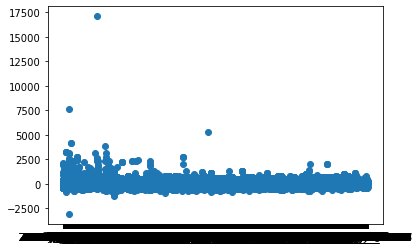

In [34]:
plt.scatter(x, y)

In [40]:
df3_cols_to_drop=['Category', 'MODIFIEDDATETIME', 'Item Creation Date' , 'Supp_BrandL2' , 'Supp_BrandL4' , 'Supp_Fabric']

df3_short = df3.drop(df3_cols_to_drop,axis=1, inplace=False)

df3_short

,DW_Id,Product Key,Company,Item Barcode,IteE ID,Item Option ID,PARTITION,INVENTDIMID,Product,Brand Code,Brand Name,Category Code,Category Name,Division Code,Division,Group Code,Group,Height,Subgroup Code,Subgroup,Size ID,Color ID,Season Code,Vendor No,Variant ID,Width,Supp_BrandL3,Supp_BrandSeason,Supp_Cut,Supp_Story,Product Type,ProductType Description,Vendor Name,DW_Batch,DW_SourceCode,OriginalPrice,CurrentPrice
0,52,5338213255,cocouae,3871112,ZS3BE6L_033760,1.560000e+18,5331188513,cocouae-01334270,5338238123,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens 2nd Layers,0,1.770000e+14,Womens Pull-Overs,4,33760,18S6,VF00347,UPV0604878,0,USD,COR-SEASONAL,LONG SLEEVE,style,1,Item,COCOBAY LLC,55555,CoCoDW,234.278052,160.528013
1,97,5387788715,cocouae,135151758,ZS1CN3L_049626,-3.190000e+18,5331188513,cocouae-01635033,5387551255,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens Naks,0,1.770000e+14,Womens Onesies/Dresses,10,49626,21S5,VF00347,UPV0852632,0,USD,COR-SEASONAL,SLEEVELESS,RUN,1,Item,COCOBAY LLC,55555,CoCoDW,32.12267,21.238279
2,207,5332553253,cocouae,178853188,ZS3BROL_037231,1.340000e+18,5331188513,cocouae-01411450,5332587328,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens SS-LS Tops,0,1.770000e+14,Womens SS Tops,10,37231,19S4,VF00347,UPV0659091,0,USD,SEASONAL,SHORT SLEEVE,RUN,1,Item,COCOBAY LLC,55555,CoCoDW,178.177826,13.384750
3,354,5338223878,cocouae,3155587,ZS2AGFL_023396,-2.120000e+18,5331188513,cocouae-01299813,5338283338,COCO,COCOBAY,100110,Womens,100110327,Womens Intimates,1.770000e+11,Womens Bras,0,1.770000e+14,Womens Sportsbras,10,28896,18W1,VF00347,UPV0606495,0,USD,SEASONAL,REGULAR,TRAIN,1,Item,COCOBAY LLC,55555,CoCoDW,114.999049,-0.753253
4,364,5338157828,cocouae,3138111,ZE5473L_011547,-5.730000e+18,5331188513,cocouae-688453,5338321883,COCO,COCOBAY,100120,Mens,100120305,Mens Bottoms,1.770000e+11,Mens Pants,0,1.770000e+14,Mens Pull On,XXL,11547,17W5,VF00347,UPV0564712,0,USD,SEASONAL,27 INCH,style,1,Item,COCOBAY LLC,55555,CoCoDW,377.196123,90.832154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74666,4927027,5387582155,cocouae,183553538.0,ZE7AQEL_052373,-8.320000e+18,5331188513,cocouae-01915585,5387333828,COCO,COCOBAY,100120,Mens,100120305,Mens Bottoms,1.770000e+11,Mens Shorts,0,1.770000e+14,Mens Fixed,S,52878,22S6,VF00347,UPV0961477,0,USD,COR-SEASONAL,5 INCH,RUN,1,Item,COCOBAY LLC,55555,CoCoDW,114.255906,58.996123
74667,4927029,5338181178,cocouae,3138382.0,ZS5AREL_031257,1.820000e+18,5331188513,cocouae-01290082,5338135331,COCO,COCOBAY,100110,Womens,100110102,Womens Bottoms,1.770000e+11,Womens Pants,0,1.770000e+14,Womens Pants,2,31257,18S1,VF00347,UPV0577579,0,USD,COR-SEASONAL,28 INCH,YOGA,1,Item,COCOBAY LLC,55555,CoCoDW,373.646972,97.750024
74668,4927083,5387855575,cocouae,132355828.0,ZE3CRXL_052323,-3.850000e+18,5331188513,cocouae-01794825,5387552323,COCO,COCOBAY,100120,Mens,100120304,Mens Tops,1.770000e+11,Mens SS-LS Tops,0,1.770000e+14,Mens SS Tops,XXL,52828,22S4,VF00347,UPV0935601,0,USD,COR-SEASONAL,SHORT SLEEVE,style,1,Item,COCOBAY LLC,55555,CoCoDW,169.695897,137.071247
74669,4927103,5338588535,cocouae,3137275.0,ZS1AALL_030339,8.130000e+18,5331188513,cocouae-01215341,5338827178,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens Naks,0,1.770000e+14,Womens Naks,12,30839,17W4,VF00347,UPV0541429,0,USD,SEASONAL,SLEEVELESS,YOGA,1,Item,COCOBAY LLC,55555,CoCoDW,91.140442,29.604133


In [44]:
result = pd.merge(df3_short, df4, on='IteE ID', how='inner')

print(result)

           DW_Id  Product Key Company_x Item Barcode         IteE ID  \
0             52   5338213255   cocouae      3871112  ZS3BE6L_033760   
1             52   5338213255   cocouae      3871112  ZS3BE6L_033760   
2             52   5338213255   cocouae      3871112  ZS3BE6L_033760   
3             52   5338213255   cocouae      3871112  ZS3BE6L_033760   
4             52   5338213255   cocouae      3871112  ZS3BE6L_033760   
...          ...          ...       ...          ...             ...   
2831782  4923317   5332718138   cocouae    3857188.0    ZS9BJPL_0001   
2831783  4925189   5338155887   cocouae    3313833.0         ZS5ZF5L   
2831784  4925932   5332832825   cocouae  172255538.0  ZS9CHPL_035450   
2831785  4925932   5332832825   cocouae  172255538.0  ZS9CHPL_035450   
2831786  4925932   5332832825   cocouae  172255538.0  ZS9CHPL_035450   

         Item Option ID   PARTITION       INVENTDIMID     Product Brand Code  \
0          1.560000e+18  5331188513  cocouae-01334270  

In [ ]:
result.dtypes

In [45]:
result

,DW_Id,Product Key,Company_x,Item Barcode,IteE ID,Item Option ID,PARTITION,INVENTDIMID,Product,Brand Code,Brand Name,Category Code,Category Name,Division Code,Division,Group Code,Group,Height,Subgroup Code,Subgroup,Size ID,Color ID,Season Code,Vendor No,Variant ID_x,Width,Supp_BrandL3,Supp_BrandSeason,Supp_Cut,Supp_Story,Product Type,ProductType Description,Vendor Name,DW_Batch,DW_SourceCode,OriginalPrice,CurrentPrice,Company_y,Variant ID_y,Transaction ID,LINENUM,Transaction Date,Transaction Time,Store,Quantity,Customer ID,Net Initial Price,Net Price,Net Cost Amount,Net Discount Amount,Net Amount,Net Gross Profit
0,52,5338213255,cocouae,3871112,ZS3BE6L_033760,1.560000e+18,5331188513,cocouae-01334270,5338238123,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens 2nd Layers,0,1.770000e+14,Womens Pull-Overs,4,33760,18S6,VF00347,UPV0604878,0,USD,COR-SEASONAL,LONG SLEEVE,style,1,Item,COCOBAY LLC,55555,CoCoDW,234.278052,160.528013,cocouae,XZC0604923,77476,1.0,2018-12-09,72727,C555,1,CF03301,434.281940,453.734471,143.437212,149.812048,262.571786,91.769365
1,52,5338213255,cocouae,3871112,ZS3BE6L_033760,1.560000e+18,5331188513,cocouae-01334270,5338238123,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens 2nd Layers,0,1.770000e+14,Womens Pull-Overs,4,33760,18S6,VF00347,UPV0604878,0,USD,COR-SEASONAL,LONG SLEEVE,style,1,Item,COCOBAY LLC,55555,CoCoDW,234.278052,160.528013,cocouae,XZC0604963,73490,1.0,2018-07-25,59676,C555,1,C555,469.467063,442.141697,155.223760,-42.394770,441.854268,283.503702
2,52,5338213255,cocouae,3871112,ZS3BE6L_033760,1.560000e+18,5331188513,cocouae-01334270,5338238123,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens 2nd Layers,0,1.770000e+14,Womens Pull-Overs,4,33760,18S6,VF00347,UPV0604878,0,USD,COR-SEASONAL,LONG SLEEVE,style,1,Item,COCOBAY LLC,55555,CoCoDW,234.278052,160.528013,cocouae,XZC0604474,52688,4.0,2018-12-17,55176,C555,1,C555,478.975754,448.673659,125.793609,-42.997404,414.185707,260.746132
3,52,5338213255,cocouae,3871112,ZS3BE6L_033760,1.560000e+18,5331188513,cocouae-01334270,5338238123,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens 2nd Layers,0,1.770000e+14,Womens Pull-Overs,4,33760,18S6,VF00347,UPV0604878,0,USD,COR-SEASONAL,LONG SLEEVE,style,1,Item,COCOBAY LLC,55555,CoCoDW,234.278052,160.528013,cocouae,XZC0604412,85166,3.0,2018-06-12,50385,C555,1,C555,469.910500,431.160936,133.624268,-15.881885,410.308191,286.844421
4,52,5338213255,cocouae,3871112,ZS3BE6L_033760,1.560000e+18,5331188513,cocouae-01334270,5338238123,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens 2nd Layers,0,1.770000e+14,Womens Pull-Overs,4,33760,18S6,VF00347,UPV0604878,0,USD,COR-SEASONAL,LONG SLEEVE,style,1,Item,COCOBAY LLC,55555,CoCoDW,234.278052,160.528013,cocouae,XZC0604963,77003,9.0,2018-08-09,47204,C555,1,CF11478,449.332292,465.000403,118.022665,-45.666364,453.576295,295.315346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831782,4923317,5332718138,cocouae,3857188.0,ZS9BJPL_0001,5.580000e+18,5331188513,cocouae-01248331,5332715817,COCO,COCOBAY,100100,Accessories,100100300,Accessories,1.770000e+11,Headwear And Seasonal,0,1.770000e+14,Womens Headwear,ONE SIZE,1,18W5,VF00347,UPV0612834,0,USD,SEASONAL,REGULAR,TRAIN,1,Item,COCOBAY LLC,55555,CoCoDW,8.189522,4.162574,cocouae,XZC0612434,47903,1.0,2018-09-14,53658,R0127,1,R0127,20.777454,24.058199,9.635792,-5.270378,56.417504,32.020836
2831783,4925189,5338155887,cocouae,3313833.0,ZS5ZF5L,8.110000e+18,5331188513,cocouae-687520,5338725338,COCO,COCOBAY,100110,Womens,100110102,Womens Bottoms,1.770000e+11,Womens Pants,0,1.770000e+14,Womens Pants,2,1,16W1,VF00347,UPV0472699,0,USD,SEASONAL,32 INCH,YOGA,1,Item,COCOBAY LLC,55555,CoCoDW,401.424014,10.183803,cocouae,XZC0472699,18769,1.0,2018-02-15,68335,C555,-1,CF09619,-507.509615,-372.917699,

In [46]:
result

,DW_Id,Product Key,Company_x,Item Barcode,IteE ID,Item Option ID,PARTITION,INVENTDIMID,Product,Brand Code,Brand Name,Category Code,Category Name,Division Code,Division,Group Code,Group,Height,Subgroup Code,Subgroup,Size ID,Color ID,Season Code,Vendor No,Variant ID_x,Width,Supp_BrandL3,Supp_BrandSeason,Supp_Cut,Supp_Story,Product Type,ProductType Description,Vendor Name,DW_Batch,DW_SourceCode,OriginalPrice,CurrentPrice,Company_y,Variant ID_y,Transaction ID,LINENUM,Transaction Date,Transaction Time,Store,Quantity,Customer ID,Net Initial Price,Net Price,Net Cost Amount,Net Discount Amount,Net Amount,Net Gross Profit
0,52,5338213255,cocouae,3871112,ZS3BE6L_033760,1.560000e+18,5331188513,cocouae-01334270,5338238123,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens 2nd Layers,0,1.770000e+14,Womens Pull-Overs,4,33760,18S6,VF00347,UPV0604878,0,USD,COR-SEASONAL,LONG SLEEVE,style,1,Item,COCOBAY LLC,55555,CoCoDW,234.278052,160.528013,cocouae,XZC0604923,77476,1.0,2018-12-09,72727,C555,1,CF03301,434.281940,453.734471,143.437212,149.812048,262.571786,91.769365
1,52,5338213255,cocouae,3871112,ZS3BE6L_033760,1.560000e+18,5331188513,cocouae-01334270,5338238123,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens 2nd Layers,0,1.770000e+14,Womens Pull-Overs,4,33760,18S6,VF00347,UPV0604878,0,USD,COR-SEASONAL,LONG SLEEVE,style,1,Item,COCOBAY LLC,55555,CoCoDW,234.278052,160.528013,cocouae,XZC0604963,73490,1.0,2018-07-25,59676,C555,1,C555,469.467063,442.141697,155.223760,-42.394770,441.854268,283.503702
2,52,5338213255,cocouae,3871112,ZS3BE6L_033760,1.560000e+18,5331188513,cocouae-01334270,5338238123,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens 2nd Layers,0,1.770000e+14,Womens Pull-Overs,4,33760,18S6,VF00347,UPV0604878,0,USD,COR-SEASONAL,LONG SLEEVE,style,1,Item,COCOBAY LLC,55555,CoCoDW,234.278052,160.528013,cocouae,XZC0604474,52688,4.0,2018-12-17,55176,C555,1,C555,478.975754,448.673659,125.793609,-42.997404,414.185707,260.746132
3,52,5338213255,cocouae,3871112,ZS3BE6L_033760,1.560000e+18,5331188513,cocouae-01334270,5338238123,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens 2nd Layers,0,1.770000e+14,Womens Pull-Overs,4,33760,18S6,VF00347,UPV0604878,0,USD,COR-SEASONAL,LONG SLEEVE,style,1,Item,COCOBAY LLC,55555,CoCoDW,234.278052,160.528013,cocouae,XZC0604412,85166,3.0,2018-06-12,50385,C555,1,C555,469.910500,431.160936,133.624268,-15.881885,410.308191,286.844421
4,52,5338213255,cocouae,3871112,ZS3BE6L_033760,1.560000e+18,5331188513,cocouae-01334270,5338238123,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens 2nd Layers,0,1.770000e+14,Womens Pull-Overs,4,33760,18S6,VF00347,UPV0604878,0,USD,COR-SEASONAL,LONG SLEEVE,style,1,Item,COCOBAY LLC,55555,CoCoDW,234.278052,160.528013,cocouae,XZC0604963,77003,9.0,2018-08-09,47204,C555,1,CF11478,449.332292,465.000403,118.022665,-45.666364,453.576295,295.315346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831782,4923317,5332718138,cocouae,3857188.0,ZS9BJPL_0001,5.580000e+18,5331188513,cocouae-01248331,5332715817,COCO,COCOBAY,100100,Accessories,100100300,Accessories,1.770000e+11,Headwear And Seasonal,0,1.770000e+14,Womens Headwear,ONE SIZE,1,18W5,VF00347,UPV0612834,0,USD,SEASONAL,REGULAR,TRAIN,1,Item,COCOBAY LLC,55555,CoCoDW,8.189522,4.162574,cocouae,XZC0612434,47903,1.0,2018-09-14,53658,R0127,1,R0127,20.777454,24.058199,9.635792,-5.270378,56.417504,32.020836
2831783,4925189,5338155887,cocouae,3313833.0,ZS5ZF5L,8.110000e+18,5331188513,cocouae-687520,5338725338,COCO,COCOBAY,100110,Womens,100110102,Womens Bottoms,1.770000e+11,Womens Pants,0,1.770000e+14,Womens Pants,2,1,16W1,VF00347,UPV0472699,0,USD,SEASONAL,32 INCH,YOGA,1,Item,COCOBAY LLC,55555,CoCoDW,401.424014,10.183803,cocouae,XZC0472699,18769,1.0,2018-02-15,68335,C555,-1,CF09619,-507.509615,-372.917699,

In [47]:
result.to_csv('MergedFile1.csv', index=False)

In [49]:
result.sort_values("Transaction Date", inplace=True)
result.reset_index(drop=True, inplace=True)

result

,DW_Id,Product Key,Company_x,Item Barcode,IteE ID,Item Option ID,PARTITION,INVENTDIMID,Product,Brand Code,Brand Name,Category Code,Category Name,Division Code,Division,Group Code,Group,Height,Subgroup Code,Subgroup,Size ID,Color ID,Season Code,Vendor No,Variant ID_x,Width,Supp_BrandL3,Supp_BrandSeason,Supp_Cut,Supp_Story,Product Type,ProductType Description,Vendor Name,DW_Batch,DW_SourceCode,OriginalPrice,CurrentPrice,Company_y,Variant ID_y,Transaction ID,LINENUM,Transaction Date,Transaction Time,Store,Quantity,Customer ID,Net Initial Price,Net Price,Net Cost Amount,Net Discount Amount,Net Amount,Net Gross Profit
0,4587756,5338523338,cocouae,3151883.0,ZE3ANGL_030333,-5.720000e+17,5331188513,cocouae-01215490,5338555338,COCO,COCOBAY,100120,Mens,100120304,Mens Tops,1.770000e+11,Mens SS-LS Tops,0,1.770000e+14,Mens SS Tops,XXL,30383,17W3,VF00347,UPV0549635,0,USD,SEASONAL,SHORT SLEEVE,style,1,Item,COCOBAY LLC,55555,CoCoDW,133.521374,17.219955,cocouae,XZC0549247,57691,3.0,2018-01-01,57178,C555,1,C555,244.800195,275.986203,87.418420,-26.248175,243.756224,133.668933
1,2452321,5338353735,cocouae,3158223,ZE5399L_026357,8.270000e+18,5331188513,cocouae-01174124,5338381527,COCO,COCOBAY,100120,Mens,100120305,Mens Bottoms,1.770000e+11,Mens Pants,0,1.770000e+14,Mens Pull On,XS,26857,17S4,VF00347,UPV0521282,0,USD,SEASONAL,34 INCH,style,1,Item,COCOBAY LLC,55555,CoCoDW,270.29286,14.901132,cocouae,XZC0521229,57726,2.0,2018-01-01,67418,R0127,1,R0127,459.244970,221.933367,141.708177,-27.997396,177.250178,46.211731
2,133268,5331852755,cocouae,3381328,ZE5799L,8.540000e+17,5331188513,cocouae-941698,5331158111,COCO,COCOBAY,100120,Mens,100120305,Mens Bottoms,1.770000e+11,Mens Pants,0,1.770000e+14,Mens Pull On,M,23133,16S6,VF00347,UPV0408304,0,NaN,NaN,NaN,NaN,1,Item,COCOBAY LLC,55555,CoCoDW,119.618576,86.255083,cocouae,XZC0339733,57726,5.0,2018-01-01,67418,C555,1,C555,499.040664,160.528430,170.353594,-15.765360,153.796299,-21.163398
3,4769658,5331851151,cocouae,3557158.0,ZE7643L,5.160000e+18,5331188513,cocouae-687519,5331158131,COCO,COCOBAY,100120,Mens,100120305,Mens Bottoms,1.770000e+11,Mens Shorts,0,1.770000e+14,Mens Pull On,XL,1,16S3,VF00347,UPV0309314,0,USD,SEASONAL,9 INCH,style,1,Item,COCOBAY LLC,55555,CoCoDW,10.353848,-4.882049,cocouae,XZC0311474,15182,1.0,2018-01-01,72479,C555,1,C555,248.682820,103.508310,65.004871,-7.119461,71.372944,33.050043
4,1278638,5338772353,cocouae,3387318,ZE3EDEL,1.160000e+18,5331188513,cocouae-692539,5331288155,COCO,COCOBAY,100120,Mens,100120304,Mens Tops,1.770000e+11,Mens SS-LS Tops,0,1.770000e+14,Mens LS Tops,XXL,4080,NOOS,VF00347,UPV0404956,0,USD,COR,LONG SLEEVE,TRAIN,1,Item,COCOBAY LLC,55555,CoCoDW,183.8937868,171.886473,cocouae,XZC0404910,15182,2.0,2018-01-01,72479,C555,1,C555,329.275465,117.183794,91.035607,-0.078043,146.067305,26.106600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831782,1598864,5387811557,cocouae,132555738,ZS3FURL_4730,-8.340000e+18,5331188513,cocouae-691106,5387833377,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens SS-LS Tops,0,1.770000e+14,Womens LS Tops,8,4780,NOOS,VF00347,UPV0921161,0,USD,COR,SHORT SLEEVE,RUN,1,Item,COCOBAY LLC,55555,CoCoDW,211.3896145,95.013231,cocouae,XZC0920220,C555-TC555-02-157334,2.0,2022-12-09,43150,C555,1,CFD152252,298.125870,271.424365,87.840025,-3.696691,243.900488,184.592462
2831783,3958052,5387811557,cocouae,132555753.0,ZS3FURL_4730,-3.520000e+18,5331188513,cocouae-01629714,5387833377,COCO,COCOBAY,100110,Womens,100110101,Womens Tops,1.770000e+11,Womens SS-LS Tops,0,1.770000e+14,Womens LS Tops,16,4780,NOOS,VF00347,UPV0937069,0,USD,COR,SHORT SLEEVE,RUN,1,Item,COCOBAY LLC,55555,CoCoDW,174.4604092,101.468138,cocouae,XZC0920220,C555-TC555-02-157334,2.0,2022-12-09,43150,C555,1,CFD152252,298.125870,271.424365,87.840025,-3.696691,243.900488,184.592462
2831784,489704,5387552537,cocouae,183

In [51]:
result_cols_to_drop=['Company_x', 'Item Option ID', 'PARTITION' , 'INVENTDIMID' , 'Brand Code' , 'Brand Name' 
                     , 'Category Code' , 'Category Name' , 'Division Code' , 'Division' , 'Group Code' , 'Group' 
                     , 'Height' , 'Subgroup Code' , 'Subgroup' , 'Size ID' , 'Color ID' , 'Season Code' , 'Vendor No' 
                     , 'Variant ID_x' , 'Width' , 'Supp_BrandL3' , 'Supp_BrandSeason' , 'Supp_Cut' , 'Supp_Story' 
                     , 'Product Type' , 'ProductType Description' , 'Vendor Name' , 'DW_Batch' , 'DW_SourceCode'
                     , 'OriginalPrice' , 'CurrentPrice' , 'Company_y' , 'Variant ID_y' , 'Transaction ID' , 'LINENUM']

result_short = result.drop(result_cols_to_drop,axis=1, inplace=False)

result_short

,DW_Id,Product Key,Item Barcode,IteE ID,Product,Transaction Date,Transaction Time,Store,Quantity,Customer ID,Net Initial Price,Net Price,Net Cost Amount,Net Discount Amount,Net Amount,Net Gross Profit
0,4587756,5338523338,3151883.0,ZE3ANGL_030333,5338555338,2018-01-01,57178,C555,1,C555,244.800195,275.986203,87.418420,-26.248175,243.756224,133.668933
1,2452321,5338353735,3158223,ZE5399L_026357,5338381527,2018-01-01,67418,R0127,1,R0127,459.244970,221.933367,141.708177,-27.997396,177.250178,46.211731
2,133268,5331852755,3381328,ZE5799L,5331158111,2018-01-01,67418,C555,1,C555,499.040664,160.528430,170.353594,-15.765360,153.796299,-21.163398
3,4769658,5331851151,3557158.0,ZE7643L,5331158131,2018-01-01,72479,C555,1,C555,248.682820,103.508310,65.004871,-7.119461,71.372944,33.050043
4,1278638,5338772353,3387318,ZE3EDEL,5331288155,2018-01-01,72479,C555,1,C555,329.275465,117.183794,91.035607,-0.078043,146.067305,26.106600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831782,1598864,5387811557,132555738,ZS3FURL_4730,5387833377,2022-12-09,43150,C555,1,CFD152252,298.125870,271.424365,87.840025,-3.696691,243.900488,184.592462
2831783,3958052,5387811557,132555753.0,ZS3FURL_4730,5387833377,2022-12-09,43150,C555,1,CFD152252,298.125870,271.424365,87.840025,-3.696691,243.900488,184.592462
2831784,489704,5387552537,183511151,ZS6BOYL_055354,5387313352,2022-12-09,43150,C555,1,CFD152252,366.701265,355.622146,105.634640,-10.166961,366.426909,251.483728
2831785,2661932,5387338113,135351811,ZS2CYFL_0001,5387812117,2022-12-09,43150,R0127,1,CFD152252,469.019632,454.231624,129.496259,-6.231439,409.159744,290.152030


In [53]:
result_short.dtypes

DW_Id                           int64
Product Key                     int64
Item Barcode                   object
IteE ID                        object
Product                         int64
Transaction Date       datetime64[ns]
Transaction Time                int64
Store                          object
Quantity                        int64
Customer ID                    object
Net Initial Price             float64
Net Price                     float64
Net Cost Amount               float64
Net Discount Amount           float64
Net Amount                    float64
Net Gross Profit              float64
dtype: object

In [54]:
result_grouped = result_short.groupby("Transaction Date")

In [55]:
result_grouped

In [57]:
result2 = result_grouped["Net Gross Profit"].sum()

In [ ]:
result2 = pd.DataFrame({"Transaction Date": result2.index, "Net Gross Profit": result2.values})

In [60]:
result2

,Transaction Date,sum
0,2018-01-01,122490.192525
1,2018-01-02,130188.739551
2,2018-01-03,172332.889959
3,2018-01-04,208073.528688
4,2018-01-05,245056.671251
...,...,...
1692,2022-12-05,323529.575029
1693,2022-12-06,375260.403744
1694,2022-12-07,257193.805082
1695,2022-12-08,222751.033389


In [68]:
result2['sum'] = result2['sum'].astype(int)

In [69]:
result2.dtypes

Transaction Date    datetime64[ns]
sum                          int32
dtype: object

In [71]:
result2

,Transaction Date,sum
0,2018-01-01,122490
1,2018-01-02,130188
2,2018-01-03,172332
3,2018-01-04,208073
4,2018-01-05,245056
...,...,...
1692,2022-12-05,323529
1693,2022-12-06,375260
1694,2022-12-07,257193
1695,2022-12-08,222751


In [61]:
result2.to_csv('Total_Net_Gross_Profit.csv', index=False)